In [2]:
import sklearn
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from keras.layers import Dense, Activation
from keras.models import Sequential
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report,confusion_matrix
import pandas as pd
import collections
import seaborn as sns


ModuleNotFoundError: No module named 'keras'

In [ ]:
df = pd.read_csv('data.csv')
df

In [10]:
# In addition to structural and sequence features, combination of features may also act as a key to 
# thermostability (Farias et al., 2004). Research (Farias et al., 2004) has shown that the ratio 
# between glutamic acid plus lysine and glutamine plus histidine gives a higher thermostability. 
# This means that combination of amino acid (E + K)/(Q + H) may be important to protein thermostability.

proteins = df['protein']

X = df.drop(['tm'], axis=1)
y = df['tm']


# add features
for index, row in X.iterrows():
    sequence = row[1]
    counts = collections.Counter(sequence)
    
    # add (E + K)/(Q + H) ratio feature
    if (counts['Q'] + counts['H']) != 0:
        X.at[index, '(E + K)/(Q + H)'] = (counts['E'] + counts['K']) /(counts['Q'] + counts['H'])
    else:
        X.at[index, '(E + K)/(Q + H)'] = 0   
        
    X.at[index, 'E'] = 1 if counts['E'] > 0 else 0   

        
    


In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y)


# sc = StandardScaler()
# X_train = sc.fit_transform(X_train)
# X_test = sc.transform(X_test)


In [16]:
# Initialising the ANN
model = Sequential()

# Adding the input layer and the first hidden layer
model.add(Dense(32, activation = 'relu', input_dim = 2))

# Adding the second hidden layer
model.add(Dense(units = 32, activation = 'relu'))

# Adding the third hidden layer
model.add(Dense(units = 32, activation = 'relu'))

# Adding the output layer
model.add(Dense(units = 1))

model.compile(optimizer = 'adam', loss = 'mean_squared_error')


In [17]:
model.fit(X_train.drop(['protein', 'sequence'], axis=1), y_train, batch_size = 10, epochs = 100)


Epoch 1/100
27/27 [==============================] - 1s 19ms/step - loss: 117819.8359
Epoch 2/100
27/27 [==============================] - 0s 210us/step - loss: 117706.7873
Epoch 3/100
27/27 [==============================] - 0s 209us/step - loss: 117578.5307
Epoch 4/100
27/27 [==============================] - 0s 209us/step - loss: 117459.5049
Epoch 5/100
27/27 [==============================] - 0s 217us/step - loss: 117319.2208
Epoch 6/100
27/27 [==============================] - 0s 227us/step - loss: 117176.3915
Epoch 7/100
27/27 [==============================] - 0s 235us/step - loss: 117008.9511
Epoch 8/100
27/27 [==============================] - 0s 365us/step - loss: 116835.0463
Epoch 9/100
27/27 [==============================] - 0s 235us/step - loss: 116641.2598
Epoch 10/100
27/27 [==============================] - 0s 236us/step - loss: 116423.3168
Epoch 11/100
27/27 [==============================] - 0s 223us/step - loss: 116183.1534
Epoch 12/100
27/27 [======================

27/27 [==============================] - 0s 203us/step - loss: 7279.7458
Epoch 96/100
27/27 [==============================] - 0s 188us/step - loss: 7064.3749
Epoch 97/100
27/27 [==============================] - 0s 205us/step - loss: 6846.0174
Epoch 98/100
27/27 [==============================] - 0s 166us/step - loss: 6603.1994
Epoch 99/100
27/27 [==============================] - 0s 189us/step - loss: 6407.8772
Epoch 100/100
27/27 [==============================] - 0s 190us/step - loss: 6206.5391


In [ ]:
# width = 0.4

# y_pred = model.predict(X_test.drop(['protein', 'sequence'], axis=1))

# pred = [float(y_pred[i]) for i in range(len(y_pred))]

# ind = [i for i in range(len(pred))]

# fig = plt.figure()
# ax = fig.add_subplot(111)

# real_values = ax.bar(X_test['protein'], y_test, color = 'red', label = 'Real', width=0.4)
# pred_values = ax.bar(X_test['protein'], pred, color = 'blue', label = 'Predicted', width=0.4)
# plt.title('Prediction')
# plt.ylabel('Tm') 
# plt.xlabel('Protein') 
# ind = np.arange(len(y_test))
# ax.set_xticks(ind + width)
# ax.legend((y_test, pred), ('true', 'predicted'))
# sns.set()
# plt.show()


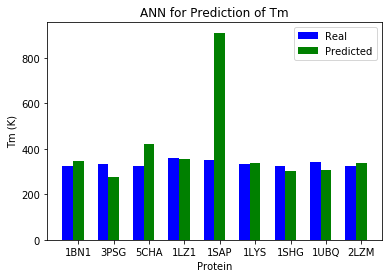

In [19]:
pred = model.predict(X_test.drop(['protein', 'sequence'], axis=1))


ind = np.arange(len(pred))  # the x locations for the groups
width = 0.30 #  the width of the bars

fig = plt.figure()
ax = fig.add_subplot(111)


y_pred = model.predict(X_test.drop(['protein', 'sequence'], axis=1))

y_pred = [float(y_pred[i]) for i in range(len(y_pred))]


real_bar = ax.bar(ind, y_test.values, width, color='b')
# zvals = [1,2,3]
predicted_bar = ax.bar(ind+ width, y_pred, width, color='g')
# kvals = [11,12,13]

ax.set_ylabel('Tm')
ax.set_xticks(ind+width)
ax.set_xticklabels( X_train['protein'] )
ax.legend( (real_bar[0], predicted_bar[0]), ('Real', 'Predicted') )

plt.title('ANN for Prediction of Tm')
plt.ylabel('Tm (K)') 
plt.xlabel('Protein') 


# adds the y-value to each bar 
def autolabel(rects):
    for rect in rects:
        h = rect.get_height()
        ax.text(rect.get_x()+rect.get_width()/2., 1.05*h, '%d'%int(h),
                ha='center', va='bottom')

# autolabel(rects1)
# autolabel(rects2)


In [1]:
import csv
import sklearn
from sklearn.model_selection import train_test_split

DATA_FILE = "../Data/data_full_simple_short_2.csv"
PROTEIN_SEQUENCE_INDEX = 1
TM_INDEX = 0

MUTATED_SYNTHETIC_DATA_FILE_NAME = "synthetic_data_mutated.csv"
TEST_DATA_FOR_SYNTHETIC_DATA = "test_synthetic_data_mutated.csv"

AMINO_ACIDS = ['A', 'G', 'V', 'C', 'P', 'L', 'I', 'M', 'W', 'F', 'K', 'R', 'H', 'S', 'T', 'Y', 'N', 'Q', 'D', 'E']


def get_data(file_name, should_split):
    """
    :param file_name: the file name to be read
    :return: the data, where the TM_INDEX gives the index of the TM and PROTEIN_SEQUENCE_INDEX gives the index of the protein
    """
    with open(file_name, encoding='utf-8-sig') as f:
        csv_reader = csv.reader(f)
        two_d_arr = []
        for row in csv_reader:
            row_in_row = []
            for v in row:
                v = v.strip()
                if len(row_in_row) == PROTEIN_SEQUENCE_INDEX:
                    row_in_row.append(str(v))
                elif len(row_in_row) == TM_INDEX:
                    row_in_row.append(float(v))
            two_d_arr.append(row_in_row)
        if should_split:
            learning_data, test_data = train_test_split(two_d_arr)
            # Write test to file
            write_data(test_data, TEST_DATA_FOR_SYNTHETIC_DATA)
            # Return train
            return learning_data
        return two_d_arr


def mutate_data(data):
    count = 0
    old_data = data.copy()
    for tm, protein in old_data:
        for i in range(len(protein)):
            orig_aa = protein[i]
            for aa in AMINO_ACIDS:
                if aa == orig_aa: continue
                new_protein = ""
                for j in range(len(protein)):
                    if j == i:
                        new_protein += aa
                        continue
                    new_protein += protein[j]
                new_piece_of_data = [tm, new_protein]
            data.append(new_piece_of_data)
        count += 1
        print(count)
    return data


def write_data(data_to_write, filename):
    with open(filename, 'w', newline='') as fp:
        a = csv.writer(fp, delimiter=',')
        a.writerows(data_to_write)


if __name__ == "__main__":
    data = get_data(DATA_FILE, True)
    data = mutate_data(data)
    write_data(data, "synthetic_data_mutated.csv")
    print(data)


1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)

